In [47]:
import rasterio
import numpy as np

# Set file paths for input and output classified data
input_path_2023 = r"D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Makoko slum/Classfied/Classified_2023_mask.tif"
input_path_2015 = r"D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Makoko slum/Classfied/Classified_2015_mask.tif"
output_path = r"D:/Contract/Assignment/Dr. Katabagwa/Postdoctorate/Nature cities journal/Data/Shape files/Makoko slum/Classfied/molusce_output_classified.tif"

# Load classified data from 2023 and 2015 using rasterio
with rasterio.open(input_path_2023) as src_2023:
    classified_2023 = src_2023.read(1)  # Read the first band
    meta_2023 = src_2023.meta  # Get metadata for saving output
    
with rasterio.open(input_path_2015) as src_2015:
    classified_2015 = src_2015.read(1)  # Read the first band
    meta_2015 = src_2015.meta

# Ensure both rasters have the same dimensions and CRS (Coordinate Reference System)
if classified_2023.shape != classified_2015.shape:
    raise ValueError("Input rasters must have the same dimensions")
if meta_2023['crs'] != meta_2015['crs']:
    raise ValueError("Input rasters must have the same CRS")

# Calculate change detection by comparing classified images (e.g., delta between years)
delta = classified_2023 - classified_2015  # Simple subtraction between classes

# Define the classes (e.g., built-up, non-built-up, water)
class_names = ['Built', 'Non-built', 'Water']

# Calculate percentage changes for each class
class_stats = {}
total_pixels = classified_2023.size

for class_id, class_name in enumerate(class_names, start=1):
    class_2015_count = np.sum(classified_2015 == class_id)
    class_2023_count = np.sum(classified_2023 == class_id)
    
    delta_count = class_2023_count - class_2015_count
    percent_2015 = (class_2015_count / total_pixels) * 100
    percent_2023 = (class_2023_count / total_pixels) * 100
    delta_percent = percent_2023 - percent_2015
    
    class_stats[class_name] = {
        '2023': class_2023_count,
        '2015': class_2015_count,
        'Δ': delta_count,
        '2023%': percent_2023,
        '2015%': percent_2015,
        'Δ %': delta_percent
    }

# Save the output classified raster with changes
meta_2023.update(dtype=rasterio.float32)
with rasterio.open(output_path, 'w', **meta_2023) as dst:
    dst.write(delta.astype(rasterio.float32), 1)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Pandas DataFrame from the class_stats dictionary
df = pd.DataFrame(class_stats).T

# Display the table of change detection results
print(df)

# Plot a bar graph of the percentage changes for each class
plt.figure(figsize=(8, 6))
df.plot(kind='bar', x='Class', y=['2023%', '2015%', 'Δ %'])
plt.xlabel('Class')

plt.ylabel('Percentage Change')
plt.title('Change Detection Results')
plt.legend(title='Year')
plt.show()

             2023    2015       Δ      2023%      2015%       Δ %
Built       331.0  1904.0 -1573.0   1.928904  11.095571 -9.166667
Non-built   369.0   513.0  -144.0   2.150350   2.989510 -0.839161
Water      7339.0  7339.0     0.0  42.768065  42.768065  0.000000


KeyError: 'Class'

<Figure size 800x600 with 0 Axes>

             2015    2019       Δ      2015%      2019%       Δ %
Built      1904.0   331.0 -1573.0  11.095571   1.928904 -9.166667
Non-built   513.0   369.0  -144.0   2.989510   2.150350 -0.839161
Water      7339.0  7339.0     0.0  42.768065  42.768065  0.000000


AttributeError: Rectangle.set() got an unexpected keyword argument 'xticklabels'

<Figure size 800x600 with 0 Axes>

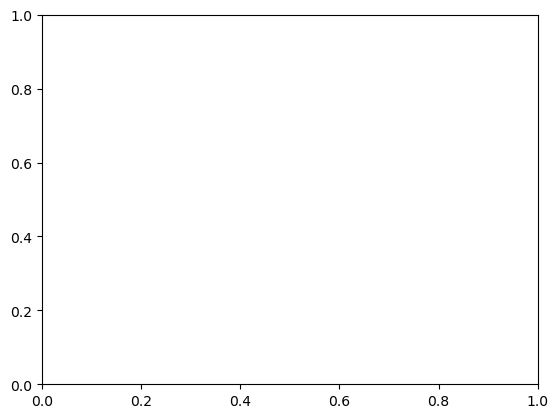

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Pandas DataFrame from the class_stats dictionary
df = pd.DataFrame(class_stats).T

# Display the table of change detection results
print(df)

# Plot a bar graph of the percentage changes for each class
plt.figure(figsize=(8, 6))
df.plot(kind='bar', xticks=range(len(class_names)), xticklabels=class_names)
plt.xlabel('Class')
plt.ylabel('Percentage Change')
plt.title('Change Detection Results')
plt.legend(title='Year')
plt.show()